## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
num_users = df.shape[0]
print('the number of users in the data is  ' + str(num_users) )

the number of users in the data is  294478


c. The number of unique users in the dataset.

In [6]:
num_unique_users = df['user_id'].nunique()
print('The number of unique users in the data is ' + str(num_unique_users))

The number of unique users in the data is 290584


d. The proportion of users converted.

In [7]:
num_unique_users_converted = df[df['converted']==1]['user_id'].nunique()
prop_unique_users_converted = num_unique_users_converted/num_unique_users
print('The proportion of unique users converted is '+ str(prop_unique_users_converted))

The proportion of unique users converted is 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df[(df['group']=='treatment') & ( df['landing_page'] == 'old_page')]['user_id'].count() \
+ \
df[(df['group']=='control') & ( df['landing_page'] == 'new_page')]['user_id'].count()

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().all()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df[    (df['group']=='treatment') & ( df['landing_page'] == 'new_page')  \
        |  (df['group']=='control') & ( df['landing_page'] == 'old_page') ]

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df.shape

(294478, 5)

In [13]:
num_unique_users_2 = df2['user_id'].nunique()
prop_unique_users_2 = num_unique_users_2/294
print('The number of unique users in the data is ' + str(num_unique_users_2))

The number of unique users in the data is 290584


b. There is one **user_id** repeated in **df2**.  What is it?

this will get the duplicated rows except forst occurrence 

In [14]:
dup = df2['user_id'][df2['user_id'].duplicated()]
dup

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2['user_id'] ==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2[df2['user_id'] ==773192].index[1]

2893

In [17]:
df2.drop(df2[df2['user_id'] ==773192].index[1],inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
num_unique_users_2 = df2['user_id'].nunique()
prop_unique_users_2 = num_unique_users_2/290584
print('The number of unique users in the data is ' + str(num_unique_users_2))
print('The proportion of unique users ' +str(prop_unique_users_2))

The number of unique users in the data is 290584
The proportion of unique users 1.0


In [19]:
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
control_df2  = df2.query(' group == "control" ')
control_df2.converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
treatment_df2  = df2.query(' group == "treatment" ')
treatment_df2.converted.mean()

0.11880806551510564

In [23]:
sample_diff = treatment_df2.converted.mean() - control_df2.converted.mean()
sample_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [24]:
(df2.landing_page=='new_page').mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

As any individual has equal chance of receiving the new page or the old page 
0.5000
and becasue proportion of conversion for control group is bigger than the proportion of conversion of treatment by 1% there is no sufficient evidence taht the new treatment page leads to more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**
Ho : the conversion rate of the old page is the same as or higher than the new page 
Ho : p_new -p_old<=0
Ha : the conversion rate for new page is hugher than the old page 
Ha : p-new-p_old>0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new_null = (df2['converted']==1).mean()
p_new_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old_null = (df2['converted']==1).mean()
p_old_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
df2_treatment = df2.query('group == "treatment"')
n_new = df2_treatment['user_id'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
df2_control = df2.query('group == "control"')
n_old = df2_control['user_id'].count()
n_old

145274

In [29]:
n_new+n_old

290584

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = df2_treatment.sample(n_new,replace = True).converted
new_page_converted

101062    0
44404     0
235709    0
26610     0
227837    0
217114    0
212086    0
157595    1
121726    1
224727    0
4568      0
124158    0
105415    0
133164    0
185103    0
255466    0
195993    0
293970    0
180849    0
63544     0
33501     0
289049    0
41647     0
233338    0
29420     0
101580    0
69193     0
166333    1
34608     0
132031    0
         ..
163554    0
242474    0
274646    0
231259    0
6084      1
253296    1
232674    0
110256    0
50837     0
6101      0
2772      0
92011     0
83662     0
121346    1
18498     1
40196     0
132696    0
158461    0
208619    0
254967    0
176603    0
241082    0
234644    0
178876    0
54732     0
1427      1
2732      0
22468     0
222274    1
262373    0
Name: converted, Length: 145310, dtype: int64

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = df2_control.sample(n_old , replace = True).converted
old_page_converted

212173    0
123124    0
55148     0
247382    0
159826    0
288534    0
261497    0
147710    0
225038    0
281772    0
213302    1
41656     0
125568    0
217475    0
20517     1
70111     0
35819     0
105997    0
102218    0
76861     0
294187    0
101321    0
144572    0
187824    0
24142     1
68297     0
271263    0
127663    0
284053    0
216270    1
         ..
137108    0
166154    0
151421    0
181058    0
142671    0
55557     0
255532    0
92482     0
249613    0
54254     0
276442    0
25457     1
234912    1
74366     0
95043     0
237078    0
19753     0
266060    0
202092    0
291068    0
69988     0
254614    1
111843    0
219756    1
223880    0
220520    0
58020     0
58674     0
38860     0
163997    0
Name: converted, Length: 145274, dtype: int64

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted.mean() - new_page_converted.mean()

0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
p_diffs = []
for _ in range(10000):
    old_page_converted_mean = df2_control.sample(n_old , replace = True).converted.mean()
    new_page_converted_mean = df2_treatment.sample(n_new,  replace = True).converted.mean()
    p_diff = new_page_converted_mean - old_page_converted_mean
    p_diffs.append(p_diff)
    


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   23.,   117.,   638.,  1736.,  2821.,  2633.,  1476.,   456.,
           90.,    10.]),
 array([-0.00601774, -0.00510923, -0.00420072, -0.00329221, -0.0023837 ,
        -0.00147519, -0.00056668,  0.00034184,  0.00125035,  0.00215886,
         0.00306737]),
 <a list of 10 Patch objects>)

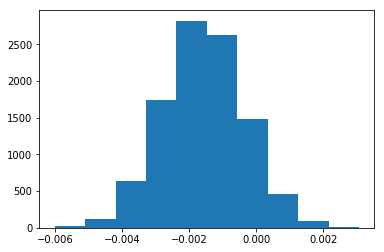

In [34]:
plt.hist(p_diffs)

In [35]:
np.array(p_diffs).mean()

-0.0015787855944643218

We can see that approximately the distribution is centered at -0.00159
very close to zero or even smaller 
so i don't have strong evidence to reject the null hypothesis 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
# h0 p_new - p_old<=0 sam as p_old-p_new>=0
#ha  p_new - p_old>0

sampling_distribution_std = np.array(p_diffs).std()
null_diffs = np.random.normal(0,scale = sampling_distribution_std, size = len(p_diffs))


In [37]:
(null_diffs>sample_diff).mean()

0.90380000000000005

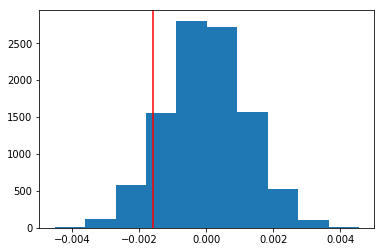

In [38]:
plt.hist(null_diffs)
plt.axvline(sample_diff, color = 'r')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
in part j first i compute the standard deviation of sampling distribution 
so that i can use it to generate distribution as if the null hypothesis is true that the conversion rate for new page is less than or equal to conversion rate of old page , in other words the the new page can not do better than the old page to increase conversion rate than old page 

then i calculate the p- value which the probability of observing sample like i have (ab_data) if null hypothesis is true which has difference in conversion rate between new and old page
-0.0015 or even has bigger difference 

and as p_value is bigger than 0.05 so it's likely to have sample generated from null distribution 
so i don't have strong evidence to reject the null 


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2_control[df2_control['converted'] ==1 ]['user_id'].count()
convert_new = df2_treatment[df2_treatment['converted'] ==1 ]['user_id'].count()
n_old_individual = df2[df2['landing_page']=='old_page']['user_id'].count()
n_new_individual = df2[df2['landing_page']=='new_page']['user_id'].count()
convert_old, convert_new,n_old_individual , n_new_individual

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

In [40]:
df2.groupby(by = ['landing_page' , 'converted']).size()

landing_page  converted
new_page      0            128046
              1             17264
old_page      0            127785
              1             17489
dtype: int64

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [41]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score ,p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
the p-value agree with parts in j and k as they have the sam value so lead to the same conclusion 
that we fail to reject the null hypothesis and conclude that new page is not better than old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** logestic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df2['intercept']= 1
df2[[ 'control' , 'ab_page']] = pd.get_dummies(df2['group'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [43]:
df2.drop(df2['control'] , inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
import statsmodels.api as sm

In [45]:
logit_model = sm.Logit(df2['converted'] , df2[['intercept' , 'ab_page']])
results = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-16 15:07 AIC:              212779.8371
No. Observations:   290582           BIC:              212800.9964
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6668  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3123  0.1894  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.** p-value associated with ab_page is 0.1894
it differ from the value found in part|| becasue the hypotheses are different 
as we check or test whether the conversion rate depend on the page the user received in statistically significant way or not 
that the type of page user receive is useful or not in predicting whether the user will convert to the next step in user tunnel or not
null hypothesis : parameter associated with ab_page =0
alternative hypothesis : parameter associated with ab_page is unequal to zero

but for the second part 
null hypothesis : conversion rate for new page  - conversion rate for old page<=0
alternative hypothesis : conversion rate for new page  - conversion rate for old page>0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
it\s better to add other factors as cnversion rate can ne influenced with many factors like student segments whether a new or returning candidate
seasonality like new year, age of user.
the disadvantage of adding factor is that we can not add or accomodate all factors and sometimes pivots work better in practice than long-drawn research without execution.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [48]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


  i get the code in just the cell above from this repository 
  https://github.com/MarwaQabeel/Udacity-Data-Analyst-Nanodegree/blob/master/Project%204-%20Analyze%20AB%20Test%20Results/Analyze_ab_test_results_notebook.ipynb

In [49]:
df_new[['CA', 'UK' ,'US']] = pd.get_dummies(df_new['country'])

In [52]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [53]:
logitmodel = sm.Logit(df_new['converted'] , df_new[['intercept' ,'ab_page', 'UK' ,'US']])
results_country = logitmodel.fit()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


In [55]:
results_country.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-16 15:14 AIC:              212780.6124
No. Observations:   290582           BIC:              212822.9310
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2485  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3083  0.1908  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5165  0.1294  -0.0119   0.0935
==================================================================

"""

In [56]:
np.exp(results_country.params)

intercept    0.131333
ab_page      0.985152
UK           1.051944
US           1.041611
dtype: float64

we can see that the country is not related in statistically significant way to conversion rate as p-value for both UK and US are above 0.05
that the country has no significant contribution to differences in conversion rates

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']


In [61]:
logit_model2 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK_ab_page','US_ab_page','UK','US']])

result = logit_model2.fit()

result.summary2()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-16 15:17 AIC:              212782.1460
No. Observations:   290582           BIC:              212845.6239
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290576           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8714  0.3835  -0.0585   0.1523
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0176    0.0377    0.4657  0.6414  -0.0563   0.0914
==================================================================

"""

In [62]:
np.exp(result.params)

intercept     0.134794
ab_page       0.934776
UK_ab_page    1.081428
US_ab_page    1.047978
UK            1.011854
US            1.017705
dtype: float64

in general we see that all p-values for variables are above 0.05 so we don't have strong evidence that there is an  interaction between the country user live in and the page user receive that can predict whether the user will convert or no

From the above Logit Regression Results, we can see that the only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate but other variables are not statistically significant.

The country a user lives is not statistically significant on the converted rate considering the page the user land in.

For every unit for new page decreases, the user getting converted will be 7.0% more likely to happen while holding all other varibles constant.

The user getting Converted is 1.08 times more likely to happen for UK and new page users than CA and new page users while holding all other varible constant.

The user getting Converted is 1.04 times more likely to happen for US and new page users than CA and new page users while holding all other varible constant.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0